In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report,roc_auc_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [13]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['diabetes'])
    train_set_y= train_set['diabetes']
    test_set_x=test_set.drop(columns=['diabetes'])
    test_set_y= test_set['diabetes']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
   print('Recall score:', recall_score(set, predict_set))
   print('Precision score:', precision_score(set, predict_set))
   print('F1 score:', f1_score(set, predict_set))
   print('Accuracy score:', accuracy_score(set, predict_set))
   print('------------------------------------------------------')
   table=confusion_matrix(set, predict_set)
   sns.heatmap(table, cmap='Blues',annot=True,fmt='g')
   plt.xlabel('Predicted')
   plt.ylabel('True')
   print(classification_report(set, predict_set))

In [14]:
df=pd.read_csv('./diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
df=pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [16]:
train_set_x, train_set_y, test_set_x, test_set_y=split_train_test(df)

In [17]:
print('Train set: ',len(train_set_x))
print('Test set: ',len(test_set_x))

Train set:  75000
Test set:  25000


In [21]:
train_set_y.value_counts()

diabetes
0    68626
1     6374
Name: count, dtype: int64

In [27]:
randomUndersampling = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_train_undersampling, y_train_undersampling = randomUndersampling.fit_resample(train_set_x,train_set_y)
y_train_undersampling.value_counts()

diabetes
0    12748
1     6374
Name: count, dtype: int64

Logistic regression

Recall score: 0.6185324553151458
Precision score: 0.8462033462033463
F1 score: 0.7146739130434782
Accuracy score: 0.958
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22874
           1       0.85      0.62      0.71      2126

    accuracy                           0.96     25000
   macro avg       0.91      0.80      0.85     25000
weighted avg       0.96      0.96      0.95     25000



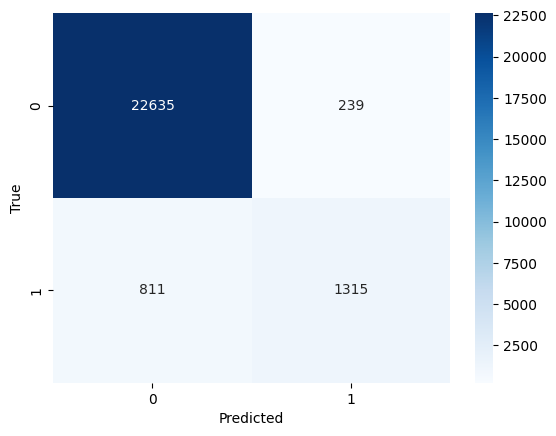

In [18]:
log_regression = LogisticRegression(random_state=45)
log_regression.fit(train_set_x, train_set_y)
log_reg_predict = log_regression.predict(test_set_x)
ver_metricas(test_set_y,log_reg_predict)

Recall score: 0.8080903104421449
Precision score: 0.5360374414976599
F1 score: 0.6445319827424498
Accuracy score: 0.9242
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     22874
           1       0.54      0.81      0.64      2126

    accuracy                           0.92     25000
   macro avg       0.76      0.87      0.80     25000
weighted avg       0.94      0.92      0.93     25000



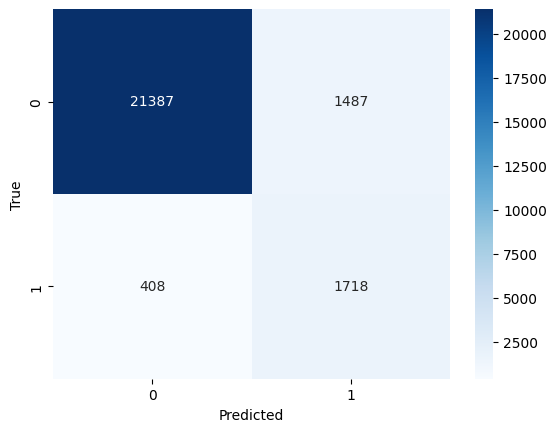

In [22]:
log_regression_under = LogisticRegression(random_state=45)
log_regression_under.fit(X_train_undersampling, y_train_undersampling)
log_reg_predict_under = log_regression_under.predict(test_set_x)
ver_metricas(test_set_y,log_reg_predict_under)

Decision Tree

Recall score: 0.7497648165569144
Precision score: 0.6960698689956332
F1 score: 0.7219202898550724
Accuracy score: 0.95088
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22874
           1       0.70      0.75      0.72      2126

    accuracy                           0.95     25000
   macro avg       0.84      0.86      0.85     25000
weighted avg       0.95      0.95      0.95     25000



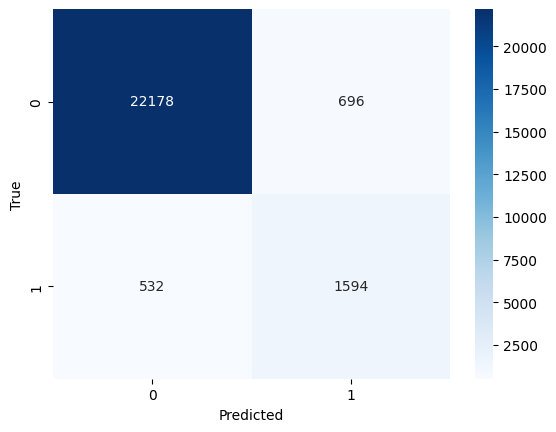

In [28]:
tree = DecisionTreeClassifier(random_state=3) 
tree.fit(train_set_x, train_set_y)
tree_predict_y= tree.predict(test_set_x)
ver_metricas(test_set_y,tree_predict_y)

Recall score: 0.8367826904985889
Precision score: 0.470386039132734
F1 score: 0.602234258632363
Accuracy score: 0.906
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     22874
           1       0.47      0.84      0.60      2126

    accuracy                           0.91     25000
   macro avg       0.73      0.87      0.77     25000
weighted avg       0.94      0.91      0.92     25000



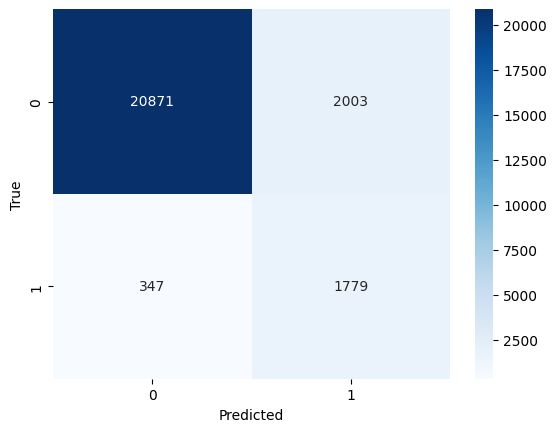

In [29]:
tree = DecisionTreeClassifier(random_state=3) 
tree.fit(X_train_undersampling, y_train_undersampling)
tree_predict_y_under= tree.predict(test_set_x)
ver_metricas(test_set_y,tree_predict_y_under)

Random Forest

Recall score: 0.6867356538099718
Precision score: 0.9401159047005795
F1 score: 0.7936939385702636
Accuracy score: 0.96964
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22874
           1       0.94      0.69      0.79      2126

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



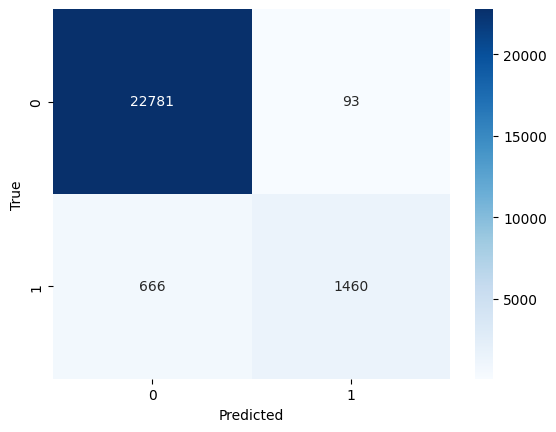

In [30]:
random_forest=RandomForestClassifier(random_state=43)
random_forest.fit(train_set_x, train_set_y)
randon_forest_predict=random_forest.predict(test_set_x)
ver_metricas(test_set_y,randon_forest_predict)

Recall score: 0.8476011288805269
Precision score: 0.585635359116022
F1 score: 0.6926773015567942
Accuracy score: 0.93604
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22874
           1       0.59      0.85      0.69      2126

    accuracy                           0.94     25000
   macro avg       0.79      0.90      0.83     25000
weighted avg       0.95      0.94      0.94     25000



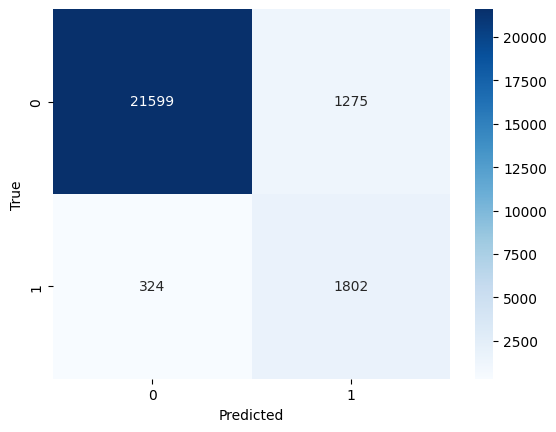

In [31]:
random_forest=RandomForestClassifier(random_state=43)
random_forest.fit(X_train_undersampling, y_train_undersampling)
randon_forest_predict_under=random_forest.predict(test_set_x)
ver_metricas(test_set_y,randon_forest_predict_under)